In [19]:
import glob 
from pathlib import Path
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [72]:
PATH = r'/Users/peaceforlives/Documents/Projects/cyberbullying/final_classification/results/'
# data = pd.read_pickle(PATH+'data_docs.pkl')
data_docs = pd.read_pickle(PATH+'full_data.pkl')
data_docs.head()

,created_at,id,source,geo,coordinates,place,lang,full_tweet,timezone,localtime,state
0,2019-08-07 14:13:45+00:00,1159105350747901953,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,None,None,en,"i mean most @ my school are fine, but the kpop dance club being koreaboos when they see any asian (and especially me being korean-american) are the ones that are rightfully bullied",None,None,None
1,2019-08-07 14:14:36+00:00,1159105565794217984,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",None,None,None,en,"@dhb_dian @msnbc @joenbc you are showing your low intelligence. it was done by castro as a bullying tactic, and as a mccarthyite-tactic threat to anyone considering donating in the future, to shut them down! castro is endangering their lives and he knows it. but media won't hold him accountable!",None,None,None
2,2019-08-07 14:14:40+00:00,1159105583246655496,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,en,"@binkybooboos @cricri51391727 @renemyriam1 @nancynofriends @rocking_with_u @lazycat48576974 @max_one_77 @mycatinblack @pbillink @valhall32843068 @lisarroberts @rhubarb_rules @jubisay6 @amara__df @hollyglly @betsywrene @asynja_gem @robintetley @poetcalloway @chrissybug5000 @ncanarchist @faux_dan_ @eddie_drood @envypost @danreed100 @amospictures1 @nessie43 @candypinnow @oppermanreport @didimond @jaimied12 @nina82997364 @dash4442 @jnon_fan @ameetatweet @sweetgeekling @betrayed_bitch @tcu_gofrogs @sos12017 @ddssy @elguapobandz @exposingjacko @evelyne1370 @jacarpb @0pinion8d @pookysoupy @glowtree3 @hssfanme @hellshousewife @mjisguilty i agree - it is a sickness, but being respectful to them and explaining things to them back in march got my account ransacked, my name, my face, my tweets and ss of my youtube account were spread around twitter for other fans to abuse, bully and stalk me so idgaf about them now.",None,None,None
3,2019-08-07 14:14:47+00:00,1159105611684089856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,en,"@jayb_1411 that’s why i hate that people now consider that bullying, that made me who i am i use to get scored on all the time when i had braces you gotta be able to laugh at urself",None,None,None
4,2019-08-07 14:15:07+00:00,1159105696325152768,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,None,None,en,@kate_mma online bullying from kate..sad to see,None,None,None


In [58]:
cols = ['bullying_trace', 'bullying_role', 'form_of_bullying', 'bullying_post_type']
df = pd.concat([data_docs, data[cols]], axis=1)
print(df.shape)
df.loc[df['bullying_trace']=='no', 'bullying_trace'] = 'NA'
df.set_index(pd.to_datetime(df['created_at']), inplace=True)
df.drop('created_at', inplace=True, axis=1)

df['date'] = [i.date() for i in df.index]
df['datestr'] = [i.date().strftime('%Y-%m-%d') for i in df.index]

df['time'] = [i.time() for i in df.index]
df['hour'] = [i.hour for i in df.index]
df['day'] = [i.day for i in df.index]
df['wkday'] = [i.weekday() for i in df.index]
df['month'] = [i.month for i in df.index]

# df = df[df.datestr != '2020-04-01']
df.tail()

(839680, 15)


,id,source,geo,coordinates,place,lang,full_tweet,timezone,localtime,state,...,bullying_role,form_of_bullying,bullying_post_type,date,datestr,time,hour,day,wkday,month
created_at,,,,,,,,,,,,,,,,,,,,,
2020-04-01 03:55:26+00:00,1245198058348056576,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,None,None,en,@satinsseoul omg sorry it's the sleep deprivation talking but i get what you mean. how old are these clowns again? i mean i'd be envious but i would never drag or bully a fan over this. or ever,None,None,None,...,NA,NA,NA,2020-04-01,2020-04-01,03:55:26,3,1,2,4
2020-04-01 03:56:25+00:00,1245198304151048193,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",None,None,None,en,"gabbiiiii! one of my subscribers and obviously one of yours, is feeling really down and has been getting bullied online a lot and was convinced by these ppl that u hate her. i cant afford another cameo right now but please remind her that u love her (@kyliegrande_ ) ♡ @gabcake",None,None,None,...,reporter,general,report,2020-04-01,2020-04-01,03:56:25,3,1,2,4
2020-04-01 03:57:53+00:00,1245198677054042112,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,en,yall @perfectgrazer is bullying me. i ruined a group chat. like everything.,None,None,None,...,victim,cyber,self-disclosure,2020-04-01,2020-04-01,03:57:53,3,1,2,4
2020-04-01 03:58:23+00:00,1245198802769727494,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",None,None,None,en,"@based_engineer @brian_cahn @aoc @aidachavez you mean none. the bitch is a coward, a textbook bully who's been a coward inside all his life. not to mention a first class piece of shit, rapist, sexual assaulter, cheater of workers, racist, cheater of wives, ehh the list goes on and we would be here all night. your brain = 💩",None,None,None,...,NA,NA,NA,2020-04-01,2020-04-01,03:58:23,3,1,2,4
2020-04-01 03:58:56+00:00,1245198938963152896,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,en,you mean i was bullied for years for nothing ??,None,None,None,...,victim,general,self-disclosure,2020-04-01,2020-04-01,03:58:56,3,1,2,4


In [60]:
df.shape

(839680, 21)

In [61]:
pd.options.display.max_colwidth = 5000
b_trace = df[df['bullying_trace']=='yes']
print(b_trace.shape)

n_tweets = b_trace['date'].groupby(b_trace['date']).count()  # total by date
n_max = n_tweets.nlargest(5).sort_index()
n_max = n_max.sort_values(ascending=False)
max_dates = n_max.index

(240018, 21)


In [66]:
b_trace['len'] = b_trace['full_tweet'].str.len()
b_trace.groupby(['bullying_role']).agg({'len': ['mean', 'min', 'max']}).to_clipboard()
b_trace.groupby(['bullying_post_type']).agg({'len': ['mean', 'min', 'max']}).to_clipboard()
b_trace.groupby(['form_of_bullying']).agg({'len': ['mean', 'min', 'max']})#.to_clipboard()

//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


len         
                        mean min  max
form_of_bullying                     
cyber             209.271429  12  750
general           211.025353  17  974
physical          229.552045  29  451
verbal            183.046296  34  351

In [67]:
dat = b_trace[b_trace['form_of_bullying']=='cyber']
dat.shape

(69963, 22)

In [68]:
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
 
from operator import itemgetter

import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [69]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

def wcplot(dat, date, n=3, attribute=None):
    if date is None:
        filename = attribute
    else:
        filename = date.strftime("%m%d%Y")+attribute
    
    # Remove punctuation
    dat['full_tweet'] = dat['full_tweet'].map(lambda x: re.sub('[,\.!?]', '', x))
    dat['full_tweet'] = dat['full_tweet'].map(lambda x: re.sub(r'http\S+', '', x))
    dat['full_tweet'][-3]

    long_string = ','.join(list(dat['full_tweet'].values))
    long_string = re.sub('\S*@\S*\s?', '', long_string)
    long_string = re.sub('\s+', ' ', long_string)
    long_string = re.sub("\'", "", long_string)
    
    # ps = PorterStemmer() 
    WNL = nltk.WordNetLemmatizer()
    stopwordsList = stopwords.words('english')
    tokens = nltk.word_tokenize(long_string)
    text = nltk.Text(tokens)
    # Remove extra chars and remove stop words.
    text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
    text_content = [word for word in text_content if word not in stopwordsList]
    text_content = [s for s in text_content if len(s) != 0]
    text_content = [WNL.lemmatize(t) for t in text_content]
    # text_content = [ps.stem(t) for t in text_content]

    if n==2:
        finder = BigramCollocationFinder.from_words(text_content)
        ngram_measures = BigramAssocMeasures()
    else:
        finder = TrigramCollocationFinder.from_words(text_content)
        ngram_measures = TrigramAssocMeasures()
    scored = finder.score_ngrams(ngram_measures.raw_freq)
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)
    word_dict = {}
    listLen = len(scoredList) 
    for i in range(listLen):
        word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

    WC_height = 1000
    WC_width = 1500
    WC_max_words = 500
    wordCloud = WordCloud(background_color="white",max_words=WC_max_words, height=WC_height, width=WC_width)
    wordCloud.generate_from_frequencies(word_dict)
    wordCloud.recolor(color_func = grey_color_func)
    
#     x = dat[attribute].unique()
    
    plt.title('Most frequently occurring trigrams'+' '+filename)#+' '+x[0])
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
#     plt.show()
    if attribute:
        plt.savefig("WC_"+filename+".png")
    else:
        plt.savefig("WC_"+filename+".png")

['self-disclosure' 'report' 'accusation']
reporter
self-disclosure
(2014, 22)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


reporter
report
(78316, 22)
reporter
accusation
(4800, 22)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


victim
self-disclosure
(78381, 22)
victim
report
(6825, 22)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


victim
accusation
(8054, 22)
defender
self-disclosure
(817, 22)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


defender
report
(17744, 22)
defender
accusation
(29081, 22)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


accuser
self-disclosure
(180, 22)


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


accuser
report
(2250, 22)
accuser
accusation
(9999, 22)
bully
self-disclosure
(933, 22)
bully
report
(208, 22)
bully
accusation
(319, 22)


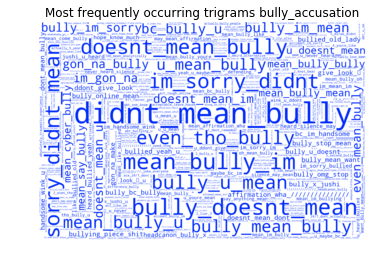

In [70]:
att = 'bullying_role'
att_types = b_trace[att].unique()
att2_types = b_trace['bullying_post_type'].unique()
print(att2_types)
att_types = [x for x in att_types if x != 'other']

# for i in range(0, len(max_dates)):
for j in range(0, len(att_types)):
    for k in range(0, len(att2_types)):
#         print(max_dates[i])
        print(att_types[j])
        print(att2_types[k])
        dat = b_trace[(b_trace[att]==att_types[j]) 
                      & (b_trace['bullying_post_type']==att2_types[k]) 
#                       & (b_trace['date']==max_dates[i]) 
                     ] 
        print(dat.shape)
        wcplot(dat=dat, date=None, n=3, attribute=att_types[j]+'_'+att2_types[k])

In [48]:
# Remove punctuation
dat['full_tweet'] = dat['full_tweet'].map(lambda x: re.sub('[,\.!?]', '', x))
dat['full_tweet'] = dat['full_tweet'].map(lambda x: re.sub(r'http\S+', '', x))

long_string = ','.join(list(dat['full_tweet'].values))
long_string = re.sub('\S*@\S*\s?', '', long_string)
long_string = re.sub('\s+', ' ', long_string)
long_string = re.sub("\'", "", long_string)
print(long_string[:500])
# # ps = PorterStemmer() 
# WNL = nltk.WordNetLemmatizer()
# stopwordsList = stopwords.words('english')
# tokens = nltk.word_tokenize(long_string)
# text = nltk.Text(tokens)
# # Remove extra chars and remove stop words.
# text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
# text_content = [word for word in text_content if word not in stopwordsList]
# text_content = [s for s in text_content if len(s) != 0]
# text_content = [WNL.lemmatize(t) for t in text_content]

//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


that’s why i hate that people now consider that bullying that made me who i am i use to get scored on all the time when i had braces you gotta be able to laugh at i am being falsely targeted and accused by this account for bullying a child with special needs : people that actually know me know how that i do not have a mean bone in my body i think the main problem was that i dared to critisize the mouvement(i was mainly talking about online bullying and numerous incidents in paris where they dest


//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


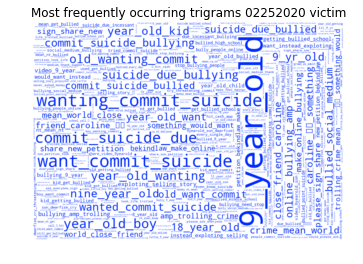

In [73]:
wcplot(dat=dat, date=dates[0], n=3, attribute=att)